# Machine Learning Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=50
sns.set(style='darkgrid',rc={'axes.facecolor':'#CAF1DE'})
import warnings
warnings.filterwarnings('ignore')

In [23]:
#read the data
df = pd.read_csv("/Users/mojca/Desktop/heart_disease.csv")
# Process the dataframe
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
#column targets
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
#Calculate mean for training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


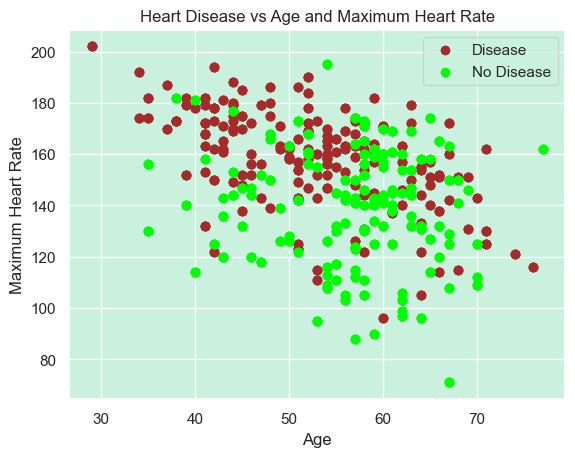

In [6]:
#scatter plot for heart diseases vs age and maximumum heart rate
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],color='#A52A2A', label='Disease')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],color='#00FF00', label='No Disease')
#Add legend
plt.legend()
#Add labels to axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
#set title
plt.title('Heart Disease vs Age and Maximum Heart Rate')
#show the plot
plt.show()


In [7]:
#Create Logistic regression
#Create the dependent and independent variables
y = df.target.values
x_data = df.drop(['target'], axis=1)  


In [8]:
#Normalize data
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
#Splittind data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#Transpose matrices
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [11]:
#Get accuracy using Logistic Regression
#Test Accuracy
accuracies={}
# Initialize the LogisticRegression model
logreg = LogisticRegression()


logreg.fit(x_train.T, y_train.T)
acc=logreg.score(x_test.T,y_test.T)*100
accuracies['LogisticRegression']=acc
#Get output
print('Test Accuracy of Logistic Regression is: {:.2f}%'.format(acc))

Test Accuracy of Logistic Regression is: 85.85%


In [12]:
#Import KNN classifiers
#Get accuracy score of K-Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)
predict=knn.predict(x_test.T)
#Get Output
print("{} NN Score is: {:.2f}%".format(2,knn.score(x_test.T,y_test.T)*100))




2 NN Score is: 98.05%


Maximum KNN Score is: 100.00%


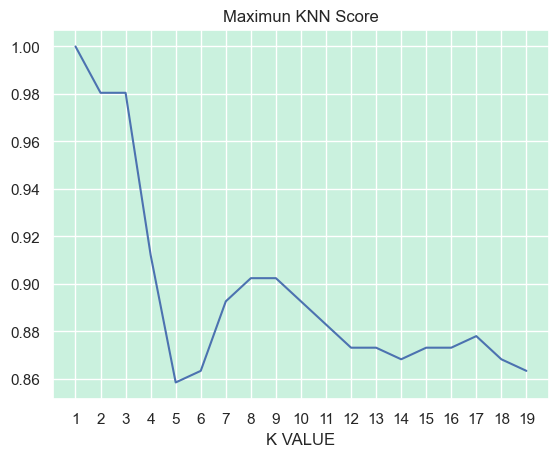

In [13]:
#Maximum KNN Score for Module
score_list=[]
for i in range(1,20):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train.T, y_train.T)
  score_list.append(knn2.score(x_test.T,y_test.T))
    
#Show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K VALUE')
plt.title('Maximun KNN Score')
plt.show

#Max KNN Score
acc=max(score_list)*100
accuracies['KNN']=acc
print('Maximum KNN Score is: {:.2f}%'.format(acc))




In [14]:
#Test Accuracy Using SVM
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train.T, y_train.T)
acc=svm.score(x_train.T,y_train.T)*100
accuracies['SVM']=acc

print('Test Accuracy of SVM is: {:.2f}%'.format(acc))

Test Accuracy of SVM is: 89.63%


In [15]:
#Get Accuracy using Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train.T, y_train.T)
acc=nb.score(x_test.T, y_test.T)*100
accuracies['Naive Bayes']=acc

print('Accuracy of Naive Bayes is: {:.2f}%'.format(acc))

Accuracy of Naive Bayes is: 85.37%


In [16]:
#Get accuracy using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtclf.fit(x_train.T, y_train.T)
acc=dtclf.score(x_test.T, y_test.T)*100
accuracies['Decision Tree']=acc

print('Accuracy of Decision Tree is: {:.2f}%'.format(acc))


Accuracy of Decision Tree is: 100.00%


In [17]:
#Get Accuracy of Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=1000, random_state=1)

rf.fit(x_train.T, y_train.T)
acc=rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest']=acc

print('Accuracy of Random Forest Algorithm is: {:.2f}%'.format(acc))

Accuracy of Random Forest Algorithm is: 100.00%


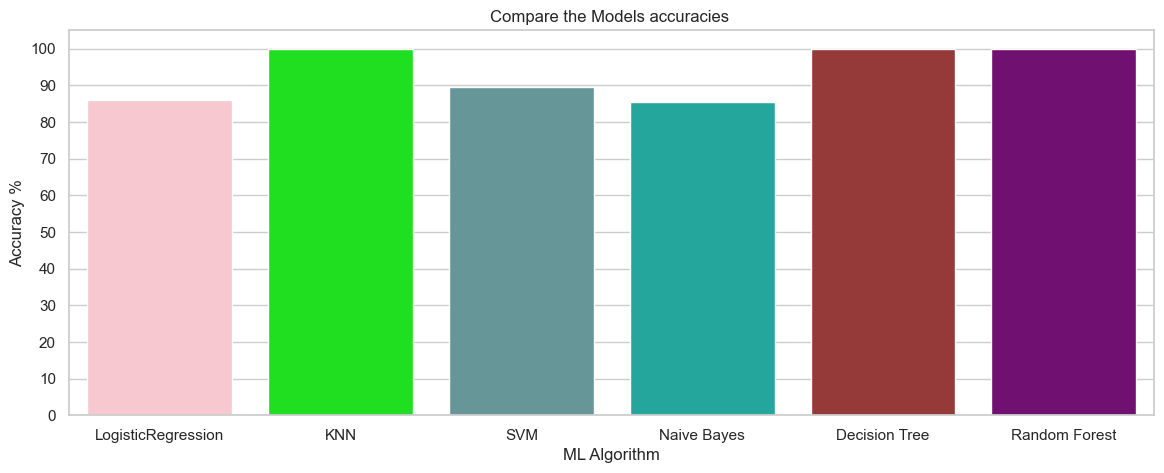

In [18]:
#Compare the Models' accuracies using a bar plot from sns
colors=['#FFC0CB','#00FF00', '#5F9EA0','#0FBBAE','#A52A2A','#800080']
sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,110,10))
plt.ylabel('Accuracy %')
plt.xlabel('ML Algorithm')
plt.title('Compare the Models accuracies ')
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()), palette=colors )
plt.show()

In [19]:
#ML confusion Matrix
#predicted values
y_head_logreg=logreg.predict(x_test.T)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T,y_train.T)
y_head_knn=knn3.predict(x_test.T)
y_head_svm=svm.predict(x_test.T)
y_head_nb=nb.predict(x_test.T)
y_head_dtclf=dtclf.predict(x_test.T)
y_head_rf=rf.predict(x_test.T)

In [20]:
#Import module for confusion matrix
from sklearn.metrics import confusion_matrix
cm_logreg=confusion_matrix(y_test,y_head_logreg)
cm_knn=confusion_matrix(y_test,y_head_knn)
cm_svm=confusion_matrix(y_test,y_head_svm)
cm_nb=confusion_matrix(y_test,y_head_nb)
cm_dtclf=confusion_matrix(y_test,y_head_dtclf)
cm_rf=confusion_matrix(y_test,y_head_rf)

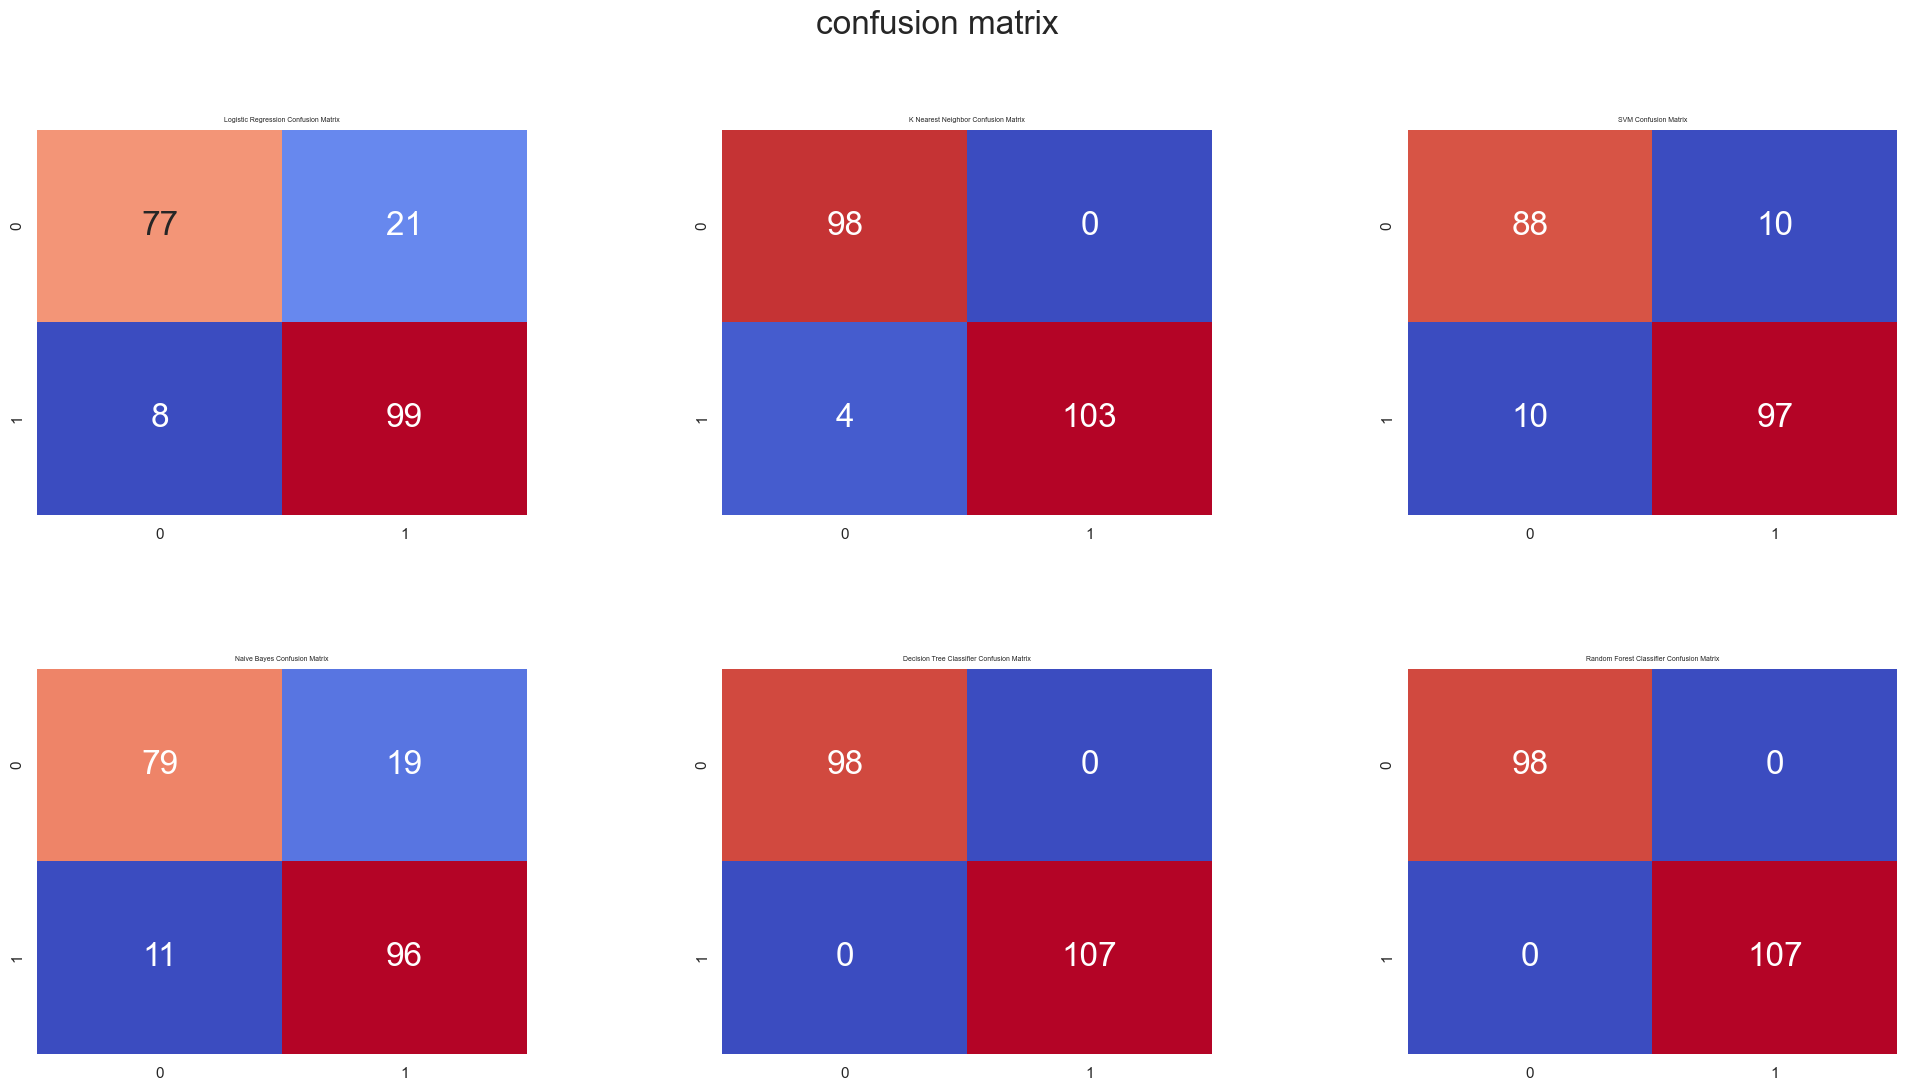

In [22]:
#plotting heatmap using confusion matrices
plt.figure(figsize=(24,12))

plt.suptitle('confusion matrix', fontsize=24)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
#Logistic Regression confusion matrix using heatmap
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix' ,fontsize=5)
sns.heatmap(cm_logreg, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={'size':24})

#K Nearest Neighbor confusion matrix using heatmap
plt.subplot(2,3,2)
plt.title('K Nearest Neighbor Confusion Matrix' ,fontsize=5)
sns.heatmap(cm_knn, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={'size':24})

#SVM confusion matrix using heatmap
plt.subplot(2,3,3)
plt.title('SVM Confusion Matrix' ,fontsize=5)
sns.heatmap(cm_svm, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={'size':24})

#Naive Bayes confusion matrix using heatmap
plt.subplot(2,3,4)
plt.title('Naive Bayes Confusion Matrix' ,fontsize=5)
sns.heatmap(cm_nb, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={'size':24})

#Decision Tree Classifier confusion matrix using heatmap
plt.subplot(2,3,5)
plt.title('Decision Tree Classifier Confusion Matrix' ,fontsize=5)
sns.heatmap(cm_dtclf, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={'size':24})

#Random Forest Classifier confusion matrix using heatmap
plt.subplot(2,3,6)
plt.title('Random Forest Classifier Confusion Matrix' ,fontsize=5)
sns.heatmap(cm_rf, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={'size':24})

plt.show()